In [6]:
import json
import spacy
import nltk
import requests
import datetime
import matplotlib.pyplot as plt

## Querying the pushshift api:

In [99]:
def get_submission_data(subreddit, keyword, lookback_days=0, num_posts=100):
    h_page = requests.get('http://api.pushshift.io/reddit/search/submission/?subreddit={}&q={}&before={}d&size={}&sort_type=score'.format(subreddit, keyword, lookback_days, num_posts))
    submissions_data = json.loads(h_page.text)
    return submissions_data
# Default is 25, max is 100

# Default is  the last n comments, we'll use sort_type = score, to try to get reasonable posts to start
# query is case-insensitive, can be used to match two different words e.g. &q=radiohead+band
# multiple subreddits e.g. ?subreddit=headphones,headphoneadvice

# can also filter for certain fields e.g. &filter=author,score,subreddit

# Advanced: using subreddit aggregation allows us to determine the top subreddits
# mentioning a certain word. Example using "trump"


subreddit = 'headphoneadvice'
lookback_days = 10
num_posts = 500
keywords_advice = ['recommendations', 'best', 'advice']

h_page = requests.get('http://api.pushshift.io/reddit/search/submission/?subreddit={}&q=recommendations&before={}d&size={}&sort_type=score'.format(subreddit,lookback_days, num_posts))

In [100]:
submissions_data_rec = get_submission_data('headphoneadvice', 'recommendations')

In [116]:
submissions_data_best = get_submission_data('headphoneadvice', 'best', num_posts=200)
submissions_data_advice = get_submission_data('headphoneadvice', 'advice')

In [39]:
d = submissions_data['data'][5]
# This takes 5 seconds per submission
c_page = requests.get('https://api.pushshift.io/reddit/submission/comment_ids/{}'.format(d['id']))

In [82]:
submissions_data = json.loads(h_page.text)

In [40]:
submissions_data['data'][:5]

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'ClarkDiggity',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_16o181',
  'author_patreon_flair': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1570816557,
  'domain': 'self.headphones',
  'full_link': 'https://www.reddit.com/r/headphones/comments/dgir97/recommendations_for_a_headphone_noob/',
  'gildings': {},
  'id': 'dgir97',
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_only': False,
  'no_follow': True,
  'num_comments': 1,
  'num_crossposts': 0,
  'over_18': False,
  'parent_w

In [83]:
num_retrieved = len(submissions_data['data'])
num_retrieved

100

In [126]:
def get_timestamps(submissions_data):
    timestamps = [s['created_utc'] for s in submissions_data['data']]
    dts = [datetime.datetime.fromtimestamp(ts) for ts in timestamps]
    return dts

def get_scores(submissions_data):
    scores = [s['score'] for s in submissions_data['data']]
    return scores

def get_num_comments(submissions_data):
    num_comments = [s['num_comments'] for s in submissions_data['data'] if s['num_comments']]
    return num_comments

100


(array([ 8., 11., 24., 22., 23.,  1.,  1.,  0.,  0., 10.]),
 array([737106.4290162 , 737158.75458565, 737211.08015509, 737263.40572454,
        737315.73129398, 737368.05686343, 737420.38243287, 737472.70800231,
        737525.03357176, 737577.3591412 , 737629.68471065]),
 <a list of 10 Patch objects>)

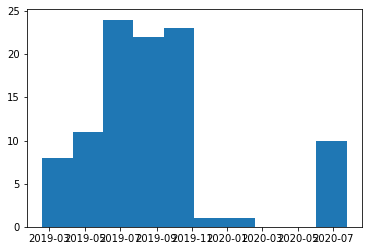

In [117]:

dts = get_timestamps(submissions_data_best)
print(len(submissions_data_best['data']))
plt.hist(dts)


(array([82., 14.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 15. ,  47.8,  80.6, 113.4, 146.2, 179. , 211.8, 244.6, 277.4,
        310.2, 343. ]),
 <a list of 10 Patch objects>)

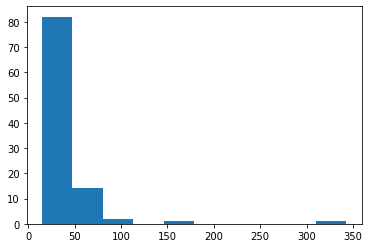

In [110]:
scores = get_scores(submissions_data_best)
plt.hist(scores)

3422

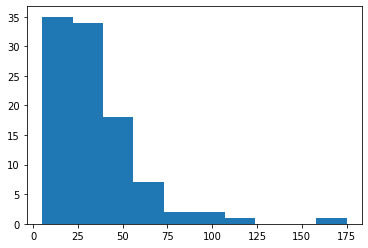

In [128]:
num_comments = get_num_comments(submissions_data_best)
plt.hist(num_comments)
sum(num_comments)

(array([ 1.,  0.,  2.,  8.,  0., 33., 25., 28.,  0.,  3.]),
 array([736535.35039352, 736644.33024537, 736753.31009722, 736862.28994907,
        736971.26980093, 737080.24965278, 737189.22950463, 737298.20935648,
        737407.18920833, 737516.16906019, 737625.14891204]),
 <a list of 10 Patch objects>)

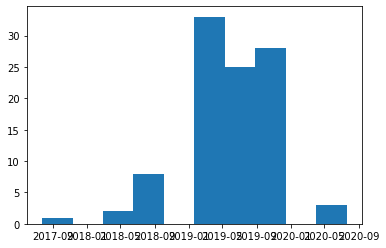

In [106]:
dts = get_timestamps(submissions_data_advice)
plt.hist(dts)

(array([70., 23.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  9. ,  25.7,  42.4,  59.1,  75.8,  92.5, 109.2, 125.9, 142.6,
        159.3, 176. ]),
 <a list of 10 Patch objects>)

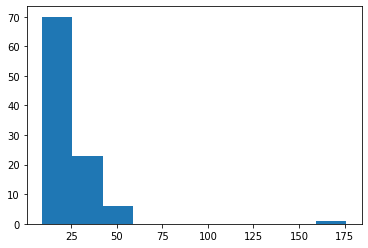

In [111]:
scores = get_scores(submissions_data_advice)
plt.hist(scores)

2190

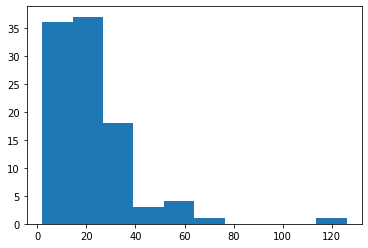

In [130]:
num_comments = get_num_comments(submissions_data_advice)
plt.hist(num_comments)
sum(num_comments)

(array([ 1.,  0.,  1., 11.,  0., 25., 36., 18.,  1.,  7.]),
 array([736535.35039352, 736644.35645833, 736753.36252315, 736862.36858796,
        736971.37465278, 737080.38071759, 737189.38678241, 737298.39284722,
        737407.39891204, 737516.40497685, 737625.41104167]),
 <a list of 10 Patch objects>)

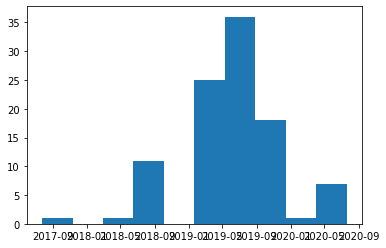

In [108]:
dts = get_timestamps(submissions_data_rec)
plt.hist(dts)

(array([55., 12., 11., 10.,  5.,  3.,  2.,  0.,  0.,  2.]),
 array([ 8. , 14.6, 21.2, 27.8, 34.4, 41. , 47.6, 54.2, 60.8, 67.4, 74. ]),
 <a list of 10 Patch objects>)

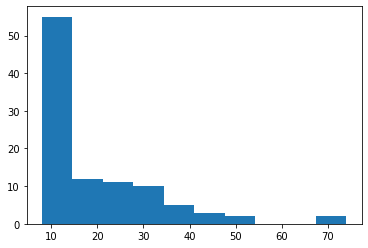

In [112]:
scores = get_scores(submissions_data_rec)
plt.hist(scores)

2034

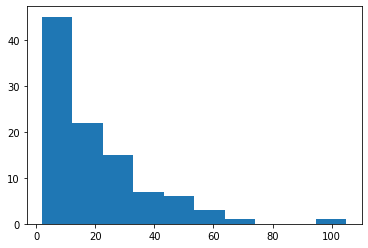

In [131]:
num_comments = get_num_comments(submissions_data_rec)
plt.hist(num_comments)
sum(num_comments)

In [136]:
submissions_data_rec['data'][5]

{'all_awardings': [],
 'allow_live_comments': False,
 'author': 'Itz5Y',
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_text': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_11z2lv',
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'can_mod_post': False,
 'contest_mode': False,
 'created_utc': 1591874188,
 'domain': 'self.HeadphoneAdvice',
 'edited': 1591918637,
 'full_link': 'https://www.reddit.com/r/HeadphoneAdvice/comments/h0xdat/wireless_headsets_under_100/',
 'gildings': {},
 'id': 'h0xdat',
 'is_crosspostable': True,
 'is_meta': False,
 'is_original_content': False,
 'is_reddit_media_domain': False,
 'is_robot_indexable': True,
 'is_self': True,
 'is_video': False,
 'link_flair_background_color': '#0aa18f',
 'link_flair_css_class': 'blue',
 'link_flair_richtext': [],
 'link_flair_template_id': '84f328f2-6d4d-11e7-8adf-0eb9d87ab560',
 'link_flair_text': 'Headphones - Wireless/Portable',
 'link_flair_text_color'

In [1]:
# Diving into data before it gets preprocessed (headphoneadvice)
interpreted_data = [["bmw", -0.2382, 1], ["kia", -0.2382, 1], ["fiio e10k", 0.0, 2], ["e10k", 0.8271, 1], ["stellia", 0.0, 1], ["the audioquest nightowls", 0.0, 1], ["monolith m1060", 0.4404, 1], ["sennheisers", -0.25, 1], ["oppo", 0.7351, 1], ["beyerdynamic", -0.2299, 1], ["stax", 0.5994, 1], ["rme adi-2 dac", 0.0, 1], ["d7200", 0.0, 1], ["denon", 0.0, 1], ["beyerdynamic", -0.4404, 1], ["spikse", 0.0, 1], ["beyerdynamic", 0.0, 1], ["stax", 0.0, 1], ["l300", 0.0, 1], ["nightowls", 0.0, 1], ["stellia", 0.0, 1], ["sennheiser", 0.0, 1], ["stax", 0.6369, 1], ["dac", 0.4939, 1], ["dac", 0.6369, 1], ["afaik", 0.3818, 1], ["pm2", 0.3612, 1], ["pm3", 0.3612, 1], ["the utopia/clear/elear/elex", 0.6124, 1], ["focal", 0.4877, 1], ["elegia", 0.0, 1], ["stellia", 0.0, 1], ["\\*facepalm\\", 0.0, 1], ["sennheiser hd 6xx", 0.0, 1], ["akgk7xx", 0.4404, 1], ["audio", 0.3612, 1], ["dac", 0.0, 1], ["dac", 0.5719, 1], ["akg", -0.5229, 1], ["58x", 0.5531, 1], ["fiio", -0.34, 1], ["e10k", -0.34, 1], ["jbs", 0.0, 1], ["dac", 0.4019, 1], ["usb", 0.4019, 1], ["dac", 0.6908, 1], ["the i/o.", 0.5106, 1], ["usb", -0.2263, 1], ["iem", 0.0, 1], ["sennhesier", 0.3291, 1], ["hd6xx", -0.5423, 1], ["akg", 0.7391, 1], ["k712", 0.7391, 1], ["amazon shops", 0.5988, 1], ["usb", 0.0, 1], ["usb", 0.2732, 1], ["usb", 0.2732, 1], ["dt990s", 0.0, 1], ["jbl", 0.0772, 1], ["jbl", 0.2732, 1], ["xfyro", 0.0, 1], ["bluetooth", 0.0, 1], ["e10k", 0.0, 1], ["k712", 0.0, 1], ["gmp", 0.0, 1], ["400", 0.0, 1], ["headphones &gt", 0.0, 1], [") &gt", 0.0, 1], ["amp &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt", 0.0, 1], ["magic stones &amp", 0.0, 1], ["origen", 0.3612, 1], ["smsl", 0.0, 1], ["jbs", 0.5994, 1], ["srh1540", 0.1779, 1], ["gmp", 0.1779, 1], ["400", 0.1779, 1], ["spirit professional", 0.1779, 1], ["sennheiser", 0.6697, 1], ["ath-a990z", 0.0, 1], ["mkii", 0.0, 1], ["yamaha", 0.0, 1], ["dac", 0.8442, 1], ["atom", 0.9428, 1], ["dac/amp", 0.9428, 1], ["https://blog.jdslabs.com/2018/03/how-to-connect-a-headphone-amplifier-to-an-audio-interface/", 0.0, 1], ["behringer", 0.0, 1], ["dac", 0.9217, 1], ["4xx", 0.4939, 1], ["philips fidelio x2hr", 0.0, 1], ["newegg", 0.2732, 1], ["hifiman sundara", 0.6369, 1], ["amazon", 0.6369, 1], ["newegg", 0.0, 1], ["amp", 0.4588, 1], ["sennheiser", 0.0, 1], ["jbl", 0.5859, 1], ["everest", 0.5859, 1], ["sony", 0.5859, 1], ["wh900", 0.5859, 1], ["anc", 0.024, 1], ["anc", 0.024, 1], ["bose", 0.8883, 1], ["momentum", -0.2755, 1], ["sony", 0.0, 1], ["headphoneadvice", 0.4019, 1], ["wh900", 0.0, 1], ["ios", 0.4749, 1], ["anc", 0.4749, 1], ["anc", 0.4749, 1], ["eq", 0.4749, 1], ["eq", 0.4749, 1], ["sony", 0.9031, 1], ["anc", -0.1779, 1], ["px", -0.1779, 1], ["master &amp", 0.7003, 1], ["dynaimic mh60s", 0.7003, 1], ["anc", 0.7003, 1], ["px", 0.0, 1], ["550s", 0.0, 1], ["bose", 0.0, 1], ["sony", 0.0, 1], ["anc", 0.0, 1], ["el mism\u00edsimo conchesumadre \ud83d\ude0e", 0.4588, 1], ["medicare", 0.4019, 1], ["ubi", 0.4019, 1], ["dem", 0.0, 1], ["intj", 0.5859, 1], ["twitter", 0.296, 1], ["anc", 0.7906, 1], ["anc", 0.875, 1], ["the sony xm3", 0.875, 1], ["anc", 0.0, 1], ["bose", 0.0, 1], ["sony", 0.0, 1], ["anc", 0.8942, 1], ["qc35", 0.2732, 1], ["bose nch 700", 0.2732, 1], ["sony", 0.2732, 1], ["ifa", 0.2732, 1], ["bose", -0.296, 1], ["anc", -0.296, 1], ["sony", -0.296, 1], ["sony", 0.4404, 1], ["the sennheiser hd280", 0.2023, 1], ["sony", 0.0, 1], ["eq", 0.0, 1], ["sony", 0.6369, 1], ["bose", 0.6369, 1], ["anc", 0.128, 1], ["phillips", -0.4215, 1], ["fidelio x2", -0.4215, 1], ["eq", 0.0, 1], ["edm/metal", 0.6369, 1], ["anc", 0.0, 1], ["bd", 0.6597, 1], ["dt770", 0.0, 1], ["k3", 0.8442, 1], ["fostex", 0.3612, 1], ["ws1100is", 0.5574, 1], ["fidelio", 0.5574, 1], ["shp9500", 0.0, 1], ["shp9500", 0.0258, 1], ["welp", 0.5256, 1], ["hd6xx", -0.0026, 1], ["beoplay", 0.1779, 1], ["amazon", 0.1779, 1], ["aptx ll", 0.6908, 1], ["aptx ll", -0.3089, 1], ["aptx", 0.0, 1], ["avantree", 0.4215, 1], ["aptx ll", 0.0, 1], ["pro 2", 0.0, 1], ["denon gc20", 0.0, 1], ["sennheiser momentum 3", 0.0, 1], ["dsp", 0.5414, 1], ["sony", -0.5096, 1], ["bose", -0.5096, 1], ["sennheiser", 0.0, 1], ["dsp", -0.3412, 1], ["sony", -0.5096, 1], ["bose", -0.5096, 1], ["btnc", 0.0, 1], ["the ms5t", 0.4404, 1], ["m50xbt", 0.3612, 1], ["sennheiser momentum", 0.0, 1], ["momentum 2.0", 0.0, 1], ["sony", -0.2263, 1], ["anc", 0.4404, 1], ["lucid", 0.0, 1], ["lucid", 0.4754, 1], ["lucid", 0.0, 1], ["steelseries", 0.0, 1], ["vr", 0.0, 1], ["qc35", 0.8979, 1], ["xm3", 0.8979, 1], ["jabra", 0.0, 1], ["sennheisers", -0.2411, 1], ["sony", 0.0, 1], ["anc", 0.6249, 1], ["xm3", 0.6249, 1], ["qc35ii", 0.0, 1], ["sony", 0.0, 1], ["sweat", 0.6991, 1], ["sennheiser", 0.3612, 1], ["58x", -0.296, 1], ["the vmoda boompro", 0.4005, 1], ["etymotic", 0.3612, 1], ["shure", 0.3612, 1], ["etymotic", 0.664, 1], ["bose", 0.6369, 1], ["anc", 0.6369, 1], ["bose", -0.6369, 1], ["the beats studio3 wireless", -0.6369, 1], ["nad viso hp50", 0.0, 1], ["audio technica ath", 0.0, 1], ["sony", 0.0, 1], ["mdr-v6\u2019s", 0.0, 1], ["sennheiser hd 598", 0.3291, 1], ["sony", 0.3291, 1], ["mdr-v6/v7506", 0.3291, 1], ["sine", 0.0, 1], ["sine", 0.7783, 2], ["el8", 0.0, 2], ["lcd", 0.1513, 1], ["sine", 0.802, 2], ["sine", 0.0, 1], ["audio", -0.2263, 1], ["ebay", 0.0, 1], ["dac", 0.0, 1], ["dac", 0.3612, 1], ["bluetooth", -0.2755, 1], ["dac", -0.4019, 1], ["sennheiser", 0.4404, 1], ["akg", 0.4404, 1], ["hifiman", 0.4404, 1], ["beyerdynamic", 0.4404, 1], ["dacs", 0.4404, 1], ["radsone", -0.1389, 1], ["bt dac/amp", -0.1389, 1], ["es100", -0.1389, 1], ["amazon", 0.1779, 1], ["headphoneadvice", 0.4574, 1], ["ve", 0.6249, 1], ["\ud83d\ude12", 0.0, 1], ["sr50bt", -0.1232, 1], ["sr50bt", 0.2617, 1], ["anc", 0.3257, 1], ["bose 700", 0.6249, 1], ["anc", 0.0, 1], ["anc", -0.5096, 1], ["bose", 0.0772, 1], ["sony", 0.0772, 1], ["sony", 0.2263, 1], ["akg", 0.0, 1], ["k7xx", 0.4019, 1], ["fps", 0.6666, 1], ["fidelio", 0.4404, 1], ["beyerdynamic custom studio", 0.0, 1], ["akg", 0.4404, 1], ["akg", 0.0, 1], ["xbox", 0.0, 1], ["k7xx/k702", 0.0, 1], ["airpods", 0.6369, 1], ["the sennheiser momentum", 0.0, 1], ["airpods", 0.0, 1], ["galaxy buds", 0.0, 1], ["sennheiser", 0.0877, 1], ["amazon", 0.3182, 1], ["sony", 0.4019, 1], ["bose", 0.4019, 1], ["b&amp;w px", 0.4019, 1], ["bluetooth 5.0", 0.0, 1], ["m1060", 0.0, 1], ["the p&amp;w b9 signature", 0.0, 1], ["audio technica ath", 0.0, 1], ["m1060", 0.6369, 1], ["aeon", 0.0, 1], ["the nad viso hp50", 0.4201, 1], ["hp70", -0.4782, 1], ["anc", -0.4782, 1], ["t3", 0.8074, 1], ["t3", 0.5244, 1], ["mt3", 0.3818, 1], ["sennheizer sennheiser 4.40", 0.3612, 1], ["fthey", 0.0, 1], ["fthey", 0.0, 1], ["t3", 0.0, 1], ["t3", 0.6486, 1], ["fiio", 0.0, 1], ["shure", 0.3724, 1], ["se535", 0.3724, 1], ["crinacle", 0.4939, 1], ["sony", 0.4939, 1], ["ibasso", 0.0, 1], ["etymotic", 0.0, 1], ["es100", 0.0, 1], ["blm", 0.8328, 1], ["cheeseburger", 0.3612, 1], ["nfl", 0.4019, 9], ["chapo traphouse", 0.0, 1], ["sennheiser", 0.3612, 1], ["the hd 58x", 0.3612, 1], ["grado", 0.0, 1], ["shp9500", 0.0, 1], ["l1", 0.0, 1], ["superlux hd668", 0.0, 1], ["fidelio", 0.0, 1], ["vmoda boom pro", 0.0, 1], ["asmr", 0.0, 1], ["xbone", 0.0, 1], ["modmic](https://smile.amazon.com/d/computer-microphones/antlion-audio-modmic-attachable-microphone/b00r98jvvu/ref=", 0.0, 1], ["electronics&amp;ie", 0.0, 1], ["utf8&amp;qid=1541733307&amp;sr=1", 0.0, 1], ["fidelios", 0.6249, 1], ["sennheiser 58x's", 0.5859, 1], ["sennheiser", 0.6476, 1], ["598", 0.6476, 1], ["fidelio", 0.7717, 1], ["sennheisers", -0.25, 1], ["nepolean", -0.4767, 1], ["siege", -0.4767, 1], ["fmg", -0.0516, 1], ["stidham", 0.0, 6], ["idk", -0.1027, 1], ["etherfax", 0.0, 0], ["bruh", 0.0, 1], ["amp/dac", 0.0, 1], ["dac/amp", 0.0, 1], ["bose", 0.0, 1], ["smsl", 0.7096, 1], ["m3", 0.7096, 1], ["dac/amp", -0.0191, 1], ["eu", -0.2411, 1], ["m3", 0.0, 1], ["k3", 0.0258, 1], ["k3", 0.0, 1], ["dac", 0.5719, 1], ["iem", 0.5719, 1], ["ohm", 0.4754, 1], ["sennheiser", 0.3612, 1], ["guest_open", 0.0, 1], ["logitech", 0.1027, 1], ["sennheiser", 0.0, 1], ["sennheiser", 0.4927, 1], ["rode psa-1", 0.296, 1], ["xlr", 0.1531, 1], ["usb", 0.1531, 1], ["amazon", 0.1779, 1], ["atr-2500", 0.0, 1], ["video](https://youtu.be/yq6jhskkdgy", 0.0, 1], ["cerb", 0.0, 2], ["service canada", 0.0, 2], ["cerb", 0.0, 2], ["ei", 0.3818, 2], ["ei", 0.3818, 2], ["ei", 0.0, 2], ["cerb", 0.0, 2], ["cerb", 0.0, 2], ["cerb", 0.0, 2], ["the canada revenue agency", 0.0, 2], ["ei", 0.7717, 2], ["ei", 0.9042, 2], ["ei", 0.802, 2], ["cerb", 0.0, 2], ["mahomes", 0.2732, 1], ["ceh", 0.4816, 1], ["falcons", 0.3612, -2], ["sysbench", 0.0, 10], ["google", 0.0, 1], ["waterdeep", -0.8639, 1], ["cassalanters", 0.6705, 1], ["falcons", -0.743, 2], ["warhammer 40k", 0.2732, 1], ["bem", 0.0, 1], ["para ser justo", 0.0, 1], ["ningu\u00e9m estava entoando", 0.0, 1], ["vallejo game", 0.5927, 1], ["the national down syndrome association", 0.0, 1], ["oc", 0.0, 0], ["the beyerdynamic dt", 0.0, 1], ["dt1990", 0.8462, 1], ["hd595", 0.8462, 1], ["eq", 0.8462, 1], ["dt1990", 0.3612, 1], ["dt1990", 0.4939, 1], ["philips", 0.0, 1], ["sennheiser hd 599", 0.0, 1], ["mh751", 0.0, 1], ["anc", 0.0387, 1], ["sennheiser", 0.0387, 1], ["ciem", 0.7906, 1], ["edm", 0.5574, 1], ["sr", 0.0, 1], ["aliexpress", 0.0, 1], ["aliexpress", 0.3182, 1], ["bluetooth", 0.2732, 1], ["aliexpress", 0.2732, 1], ["iem", 0.0, 1], ["mmcx", 0.0, 1], ["better than 300$+ iem's", 0.4404, 1], ["bluetooth", 0.4215, 1], ["kz zs3", 0.0, 1], ["bluetooth", 0.0772, 1], ["bluetooth", 0.4588, 1], ["amazon", 0.5984, 1], ["k712", 0.3182, 1], ["amazon", 0.1779, 1], ["dac", 0.0, 1], ["x2hr", 0.0, 1], ["fidelio", 0.0, 1], ["k712", 0.0, 1], ["k712", 0.0, 1], ["k612", 0.0, 1], ["k712", 0.0, 1], ["asus", 0.0, 1], ["eq", -0.3678, 1], ["eq", 0.0, 1], ["k612", 0.0, 1], ["k712", 0.0, 1], ["k712", 0.5423, 1], ["eikon", 0.6249, 1], ["eikon", -0.1531, 1], ["sony", 0.0, 1], ["\\[sony", 0.0, 1], ["headphoneadvice", 0.0, 1], ["headphoneadvice", 0.0, 1], ["anc", 0.3612, 1], ["the bose qc35ii", 0.0, 1], ["sony xm3", 0.0, 1], ["bose", 0.0772, 1], ["bose", 0.8555, 1], ["bowers &amp", 0.5927, 1], ["sennheiser", 0.5927, 1], ["pxc 550", 0.5927, 1], ["primary", 0.3182, 1], ["dolby digital 5.1ch", 0.3182, 1], ["audio", 0.3182, 1], ["dolby", 0.3182, 1], ["astro", 0.0, 1], ["ignoreme", 0.0, 1], ["astro", -0.1206, 1], ["mac", 0.4215, 1], ["vss", 0.7088, 1], ["gamedac", 0.128, 1], ["mixamp", 0.128, 1], ["vss", -0.1321, 1], ["sony", 0.0, 1], ["ebay", 0.0, 1], ["gsx1000", 0.0, 1], ["v2", 0.0, 1], ["dolby", 0.0, 1], ["dt770", 0.3716, 1], ["tsm", -0.4767, 1], ["tf", 0.0, 1], ["cna", 0.0, 1], ["covid", 0.4549, 5], ["the ny times", 0.4549, 5], ["trump", 0.296, 1], ["trump", 0.296, 1], ["n out", 0.0, 2], ["costco", 0.0, 1], ["superstore", 0.8176, 1], ["safeway", 0.8176, 1], ["livlive elive live", 0.0, 1], ["icewind", 0.0, 0], ["google", 0.0857, 1], ["bluetooth", 0.2263, 1], ["bluetooth", -0.3089, 1], ["bluetooth", 0.0, 1], ["bose", 0.3612, 1], ["bose", 0.0, 1], ["sony", 0.0, 1], ["non-anc", -0.4927, 1], ["monoprice", 0.0, 1], ["fostex", 0.0, 1], ["audio-technica", 0.0, 1], ["classics", 0.0, 1], ["beyerdynamic", 0.0, 1], ["dt770", 0.0, 1], ["android", 0.0, 1], ["huawei", 0.6597, 1], ["598sr", 0.4404, 1], ["dac/amp", 0.2584, 1], ["dac/amp", 0.4215, 1], ["nextdrive", 0.4215, 1], ["q7 israel", 0.0, 2], ["gracias", 0.0, 1], ["sansui", 0.0, 2], ["cam", 0.5171, 1], ["dt990", 0.0, 1], ["sennheiser", 0.0, 1], ["the hd 58x", 0.3268, 1], ["fidelio", 0.0, 1], ["x2/x2hr", 0.0, 1], ["dt990", 0.6557, 1], ["origen", 0.0, 1], ["the magni 3", 0.0, 1], ["the magni 3", 0.2382, 1], ["magni 3 plus", 0.0, 1], ["asus/realtek s1220a", 0.0, 1], ["strix", 0.0, 1], ["990s", 0.4019, 1], ["origen", 0.0, 1], ["valhalla 2", 0.5859, 1], ["the valhalla 2", 0.0, 1], ["cl", 0.0, 1], ["valhalla 2", 0.0, 1], ["magni", 0.0, 1], ["everyones", 0.4144, 1], ["valhalla", 0.0, 1], ["m50x", 0.0, 1], ["eq", -0.25, 1], ["eq", 0.296, 1], ["lvt", 0.3291, 2], ["bondrewd", 0.0, 2], ["byu", 0.3612, 0], ["byu", -0.5023, 0], ["university police", -0.5023, 0], ["byu", 0.3612, 0], ["byu", 0.0, 0], ["byu", 0.5499, 0], ["faegon", -0.7351, 1], ["en este pais que es idiocracy, da para presidente muy tranquilo", 0.0, 5], ["table](https://docs.google.com", 0.3182, 1], ["home depot", 0.0, 7], ["pny 3080", 0.0, 1], ["brand new.850 watt", 0.0, 1], ["reddit", 0.0, 1], ["stbx", -0.3612, 2], ["770s", 0.0082, 1], ["770s", 0.0, 1], ["higgy", 0.0, 2], ["dj", 0.0, 2], ["ahahahahahahahahahahaha", 0.0, 2], ["\ud83d\udd8c", 0.0, 1], ["mahomes", -0.541, -6], ["nighthawk", 0.0, 1], ["sennheiser", 0.3361, 1], ["sennheiser", 0.0, 1], ["nighthawk", -0.296, 1], ["nighthawk", -0.3182, 1], ["s10", -0.0274, 1], ["iphone", 0.0, 1], ["iphone", 0.0, 1], ["airpods", 0.8201, 1], ["iphone", 0.8201, 1], ["airpods", 0.8201, 1], ["bluetooth", 0.8201, 1], ["s10", 0.8201, 1], ["sennheiser momentum wireless", 0.6369, 1], ["sony", -0.3491, 1], ["anc", -0.3491, 1], ["audio", 0.0, 1], ["technicha", 0.0, 1], ["the moondrop kanas pro", 0.7684, 1]]

In [3]:
len(interpreted_data)

555

In [4]:
agreements = [d[2] for d in interpreted_data]
sentiments = [d[1] for d in interpreted_data]

In [13]:
from collections import Counter
print(Counter(agreements))

Counter({1: 509, 2: 28, 0: 9, 5: 3, 9: 1, 6: 1, -2: 1, 10: 1, 7: 1, -6: 1})
